# K-Means Clustering — Intuition, Math, and Applications

K-Means clustering is an **unsupervised learning** algorithm used to group data into $K$ clusters based on similarity. The core idea is to partition the dataset into $K$ groups where points in the same group are more similar to each other than to points in other groups.

---

## **Intuition**
Imagine we have a scatter plot of points without labels. K-Means tries to **discover structure** by:
1. Picking $K$ initial "centroids" (cluster centers).
2. Assigning each data point to the closest centroid.
3. Updating the centroids as the mean of their assigned points.
4. Repeating until assignments no longer change (or change is minimal).

This process minimizes the **within-cluster variance**, making clusters as tight and distinct as possible.

![K-Means Illustration](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/330px-K-means_convergence.gif)

---

## **Mathematical Formulation**

Given:
- $X = \{x_1, x_2, \dots, x_n\}$: the dataset of $n$ points in $\mathbb{R}^d$
- $K$: number of clusters
- $C = \{C_1, C_2, \dots, C_K\}$: the set of clusters
- $\mu_k$: centroid of cluster $C_k$

We aim to **minimize** the **objective function** (sum of squared errors):

$$
J = \sum_{k=1}^{K} \sum_{x_i \in C_k} \|x_i - \mu_k\|^2
$$

---

### **Algorithm Steps**

1. **Initialization**  
   - Choose $K$ centroids $\mu_1, \mu_2, \dots, \mu_K$ (randomly or with $k$-means++).

2. **Assignment Step**  
   Assign each point to the nearest centroid using Euclidean distance:
   $$
   c_i = \arg\min_k \|x_i - \mu_k\|^2
   $$
   This partitions the dataset into $K$ sets.

3. **Update Step**  
   Update each centroid to be the mean of its cluster:
   $$
   \mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
   $$

4. **Convergence Check**  
   Repeat steps 2 and 3 until:
   - Assignments do not change, or
   - The change in $J$ is below a threshold, or
   - A fixed number of iterations is reached.

---


## **Choosing $K$ — The Elbow Method**
We can plot $J$ (inertia) vs. $K$.  
The "elbow" point where the rate of decrease sharply changes is often a good choice for $K$.

![Elbow Method](https://media.licdn.com/dms/image/v2/D4D12AQF-yYtbzPvNFg/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1682277078758?e=1760572800&v=beta&t=onoqCLoJd4V1hrLjHPfeDCOxiexzyaQi0LWw1-HZRVQ)

---

## **Strengths**
- Simple and computationally efficient.
- Works well when clusters are spherical and similar in size.

## **Limitations**
- Must specify $K$ in advance.
- Sensitive to outliers and initial centroid positions.
- Works poorly with non-spherical clusters.

---

## **When to Use K-Means**
- **Market segmentation**: grouping customers with similar purchasing habits.
- **Image compression**: reducing colors in an image to $K$ representative colors.
- **Document clustering**: grouping news articles by topic.
- **Anomaly detection**: points far from all centroids may be outliers.

---

## **Mathematical Notes**
- Distance Metric: Usually **Euclidean distance**  
  $$
  \|x_i - \mu_k\|^2 = \sum_{j=1}^d (x_{ij} - \mu_{kj})^2
  $$
- Objective function $J$ is **non-convex**, but convex in each coordinate separately.
- Convergence is guaranteed but may reach **local minima**, hence multiple random restarts are common.

---

# Application: Clustering Wines
- Dataset comprises many different types of wine that have unqiue characteristics.
- We are interested in clustering these; perhaps, this could be helpful in determining prices or suggesting wines to people that are similar to others they have liked, etc.

| **Feature**              | **Description**                                            |
| ------------------------ | ---------------------------------------------------------- |
| **Alcohol**              | Alcohol content of the wine.                               |
| **Malic_Acid**           | Amount of malic acid.                                      |
| **Ash**                  | Ash content.                                               |
| **Ash_Alcanity**         | Ash alkalinity.                                            |
| **Magnesium**            | Magnesium content.                                         |
| **Total_Phenols**        | Total phenolic compounds.                                  |
| **Flavanoids**           | Flavanoid content.                                         |
| **Nonflavanoid_Phenols** | Non-flavonoid phenols.                                     |
| **Proanthocyanins**      | Proanthocyanin content.                                    |
| **Color_Intensity**      | Intensity of wine color.                                   |
| **Hue**                  | Hue of the wine.                                           |
| **OD280**                | Optical density at 280 nm (related to phenolic compounds). |
| **Proline**              | Proline amino acid content.                                |


In [ ]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("/Users/rykerdolese/Documents/INDE 577/Data-Science-and-Machine-Learning/src")


from mlpackage import KMeans, MLP
from mlpackage.preprocess import StandardScaler, train_test_split

In [11]:
# Load Data
data = pd.read_csv('wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
# Create a subset of the data with only two features for easier visualization
data_subset = data[['Alcohol', 'Malic_Acid']]

/var/folders/yc/s7grtn4x1q39x8dydhg_mv700000gn/T/ipykernel_2951/1801000650.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_subset['Alcohol'], data_subset['Malic_Acid'], s=50, cmap='viridis')


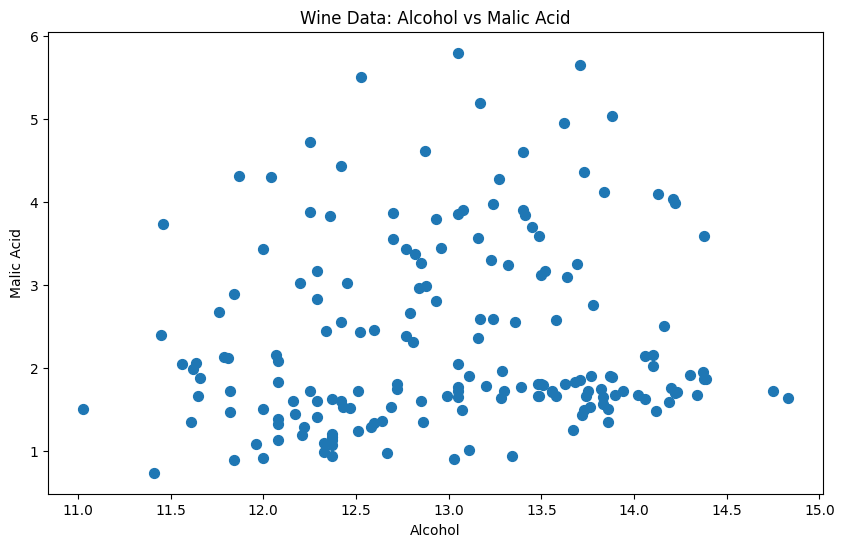

In [13]:
# Let's visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(data_subset['Alcohol'], data_subset['Malic_Acid'], s=50, cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Wine Data: Alcohol vs Malic Acid')
plt.show()

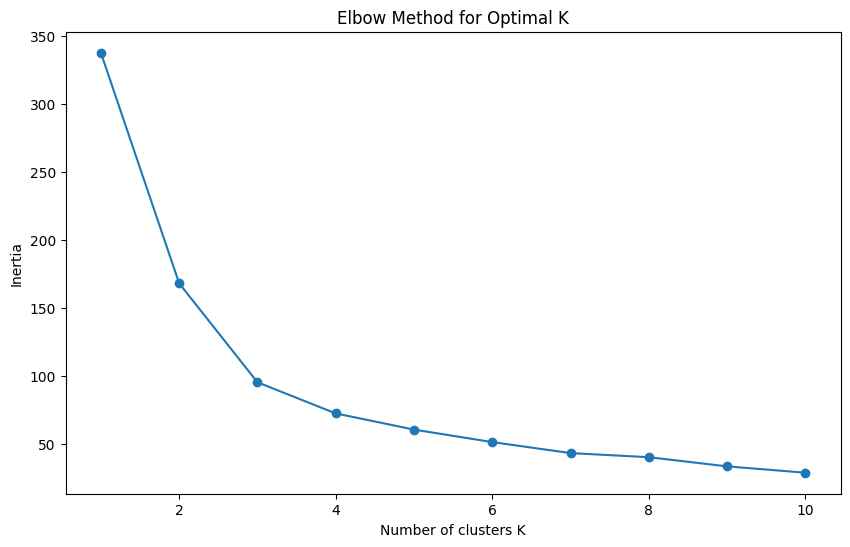

In [14]:
# Let's try different values of K and plot inertia
inertias = []
K_values = range(1, 11)
X = data_subset.values
for K in K_values:
    kmeans = KMeans(K=K)
    kmeans.fit(X)
    inertias.append(kmeans.inertia(X))
plt.figure(figsize=(10, 6))
plt.plot(K_values, inertias, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

It appears that k = 3 is probably the best for the elbow method criteria.

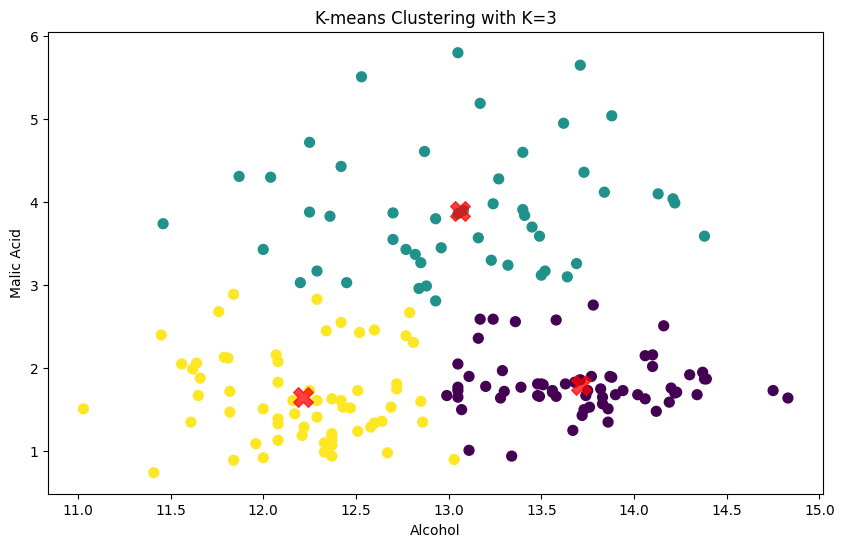

In [15]:
# Run and visualize K-means with chosen K
optimal_K = 3
kmeans = KMeans(K=optimal_K)
kmeans.fit(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, s=50, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title(f'K-means Clustering with K={optimal_K}')
plt.show()

Looks like our algorithm works well!

### Comparison to Sklearn
- Let's see if sklearn produces similar results for K=3

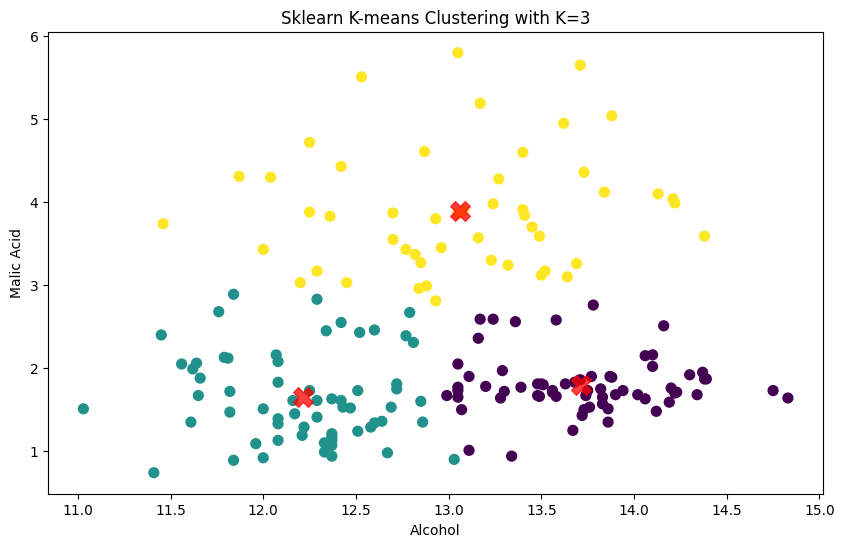

In [8]:
# Sklearn Comparison
from sklearn.cluster import KMeans as SKKMeans
sk_kmeans = SKKMeans(n_clusters=optimal_K, random_state=45)
sk_kmeans.fit(X)
sk_labels = sk_kmeans.labels_
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=sk_labels, s=50, cmap='viridis')
plt.scatter(sk_kmeans.cluster_centers_[:, 0], sk_kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title(f'Sklearn K-means Clustering with K={optimal_K}')
plt.show()

Even though k-means can be reliant on starting values, the final clusters are **very** similar. K=3 definitely appears to perform well.

### Trying with additional features to see if inertia can be smaller with $K=3$

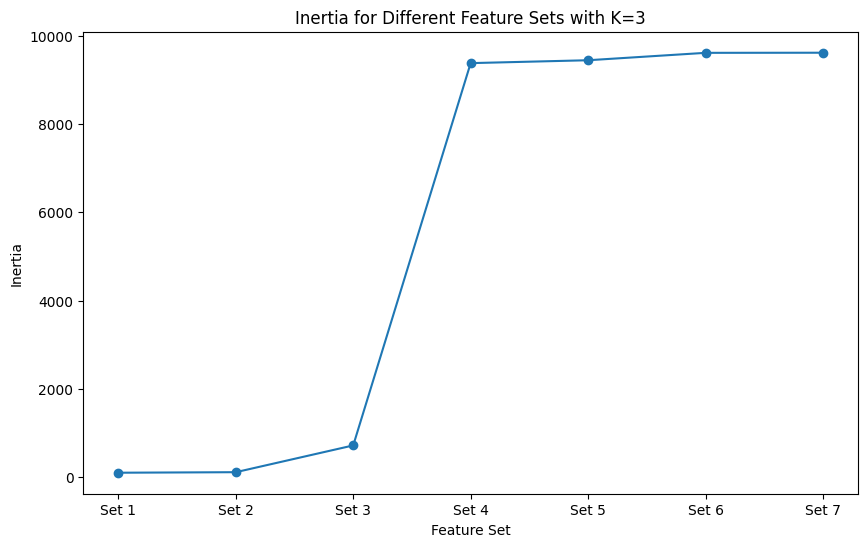

In [9]:
# Inertia comparison for K=3 for different feature sets
feature_sets = [
    ['Alcohol', 'Malic_Acid'],
    ['Alcohol', 'Malic_Acid', 'Ash'],
    ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity'],
    ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium'],
    ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols'],
    ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids'],
    ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols']
]

inertia_values = []
for features in feature_sets:
    X_subset = data[features].values
    kmeans = KMeans(K=3)
    kmeans.fit(X_subset)
    inertia_values.append(kmeans.inertia(X_subset))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(feature_sets) + 1), inertia_values, marker='o')
plt.xticks(range(1, len(feature_sets) + 1), [f'Set {i}' for i in range(1, len(feature_sets) + 1)])
plt.xlabel('Feature Set')
plt.ylabel('Inertia')
plt.title('Inertia for Different Feature Sets with K=3')
plt.show()

Inertia increases significantly when adding in 'Ash_Alcanity', which means that it provides much more variation that is not accounted for in the other features. If we increase the number of features, it might make more sense to have more clusters. 